<a href="https://colab.research.google.com/github/abel-keya/-week_6_IP_Abel_Keya_sports_teams_predictions_polynomial_and__logistic_regression_with_python/blob/master/week_6_IP_Abel_Keya_sports_teams_predictions_polynomial_and__logistic_regression_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: sports teams predictions polynomial and logistic regression with python

## 1. Defining the Question

## a) Specifying the Question

FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.
 A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.
#### Mchezopesa Ltd  is a betting company which requires  prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly with respect to FIFA rankings the [dataset](https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view) description is as follows:
## Data Features
* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


 A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly  by applying Polynomial and Logistic regression.Given a dataset of FIFA rankings.

## b) Defining the Metric for Success
* Clean dataset
* To obtain a polynomial model that has over 95% accuracy.
* To obtain a logistic model that has over 95% accuracy.

# c) Understanding the context 

 given the datasets are provided
 
 

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### Approach 1: Polynomial approach

 train given:

* Rank of home team
* Rank of away team
* Tournament type

### Model 1: Predict how many goals the home team scores.

### Model 2: Predict how many goals the away team scores.

### Approach 2: Logistic approach
predict if the game is a Win, Lose or Draw (W, L, D)
### Required to perform each of the following:
* Perform EDA
* Perform any necessary feature engineering 
* Check of multicollinearity
* building the model by 
* train the model by Cross-validation
* Compute RMSE
* Create residual plots for regression models, and assess their heteroscedasticity using Bartlett’s test
* Perform appropriate regressions on the data and show justification
* Challenge the solution by providing insights on how to make improvements.

## d) Recording the Experimental Design
* Data preparation
* Data analysis
* Data modeling

## e) Data Relevance
The data was appropriate for the regression analysis that was needed.

# 2. Reading the Data

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset
#fifa_ranking daset
ranking=pd.read_csv('fifa_ranking.csv')
ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
#results dataset
results=pd.read_csv('results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#fifa_ranking dataset
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [5]:
#results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [6]:
# Previewing the top of our dataset
#ranking dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
#results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Previewing the bottom of our dataset
# ranking dataset
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [9]:
#results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
# Checking whether each column has an appropriate datatype
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [11]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 4. External Data Source Validation

### a.Validation
The data was validated against FIFA rating and rankings at [https://fcpython.com/blog/filter-python-database-to-find-better-cheaper-players-using-fifas-ratings](https://fcpython.com/blog/filter-python-database-to-find-better-cheaper-players-using-fifas-ratings)

## 5. Tidying the Dataset

In [12]:
#concatenating the ranking and results dataset
teams = pd.concat([results,ranking],axis=1)
teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [13]:
#checking the shape of teams dataset
teams.shape

(57793, 25)

In [14]:
#description of numeric data columns
teams.describe()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,40839.000000,40839.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,1.745709,1.188105,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,1.749145,1.405120,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,0.000000,0.000000,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,31.000000,21.000000,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [15]:
#determining the tatol records per column
teams.count()

date                       40839
home_team                  40839
away_team                  40839
home_score                 40839
away_score                 40839
tournament                 40839
city                       40839
country                    40839
neutral                    40839
rank                       57793
country_full               57793
country_abrv               57793
total_points               57793
previous_points            57793
rank_change                57793
cur_year_avg               57793
cur_year_avg_weighted      57793
last_year_avg              57793
last_year_avg_weighted     57793
two_year_ago_avg           57793
two_year_ago_weighted      57793
three_year_ago_avg         57793
three_year_ago_weighted    57793
confederation              57793
rank_date                  57793
dtype: int64

In [0]:
# Checking for Outliers

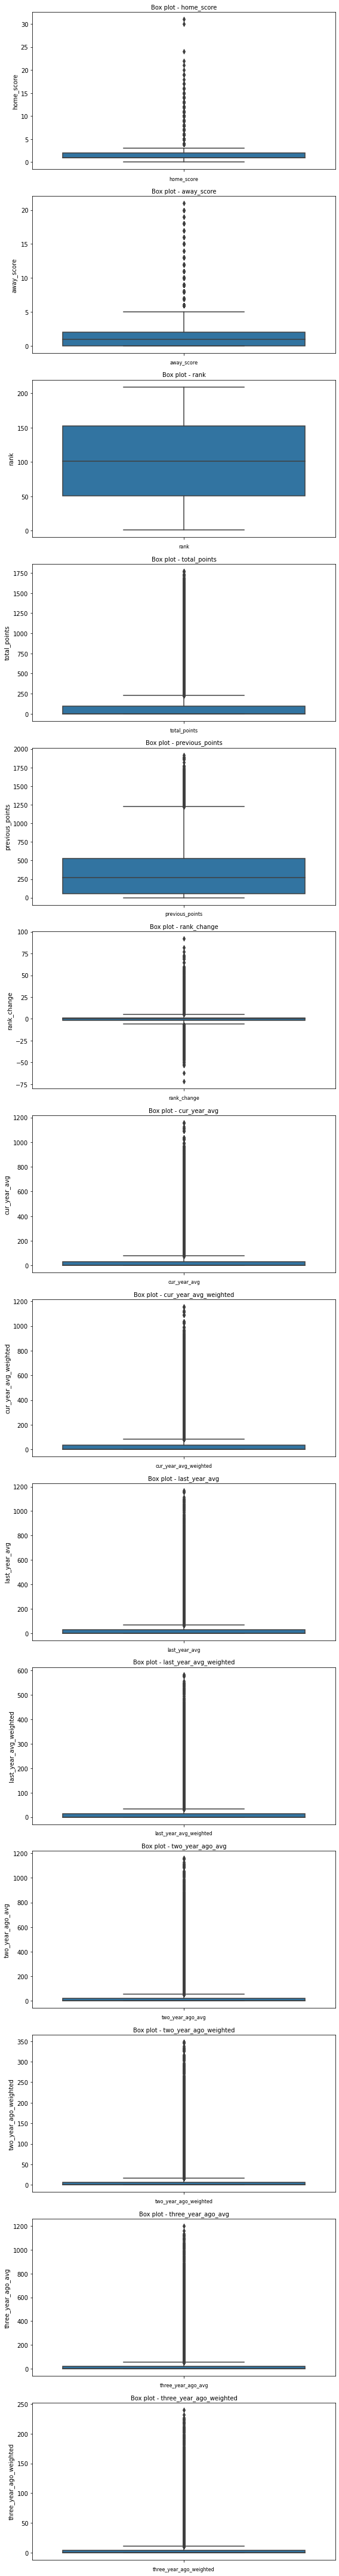

In [17]:
#checking for outliers in the dataset
col_names = numeric_clmns = teams.dtypes[teams.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=teams[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

In [0]:
# Checking for Anomalies


In [19]:
# Identifying the Missing Data
teams.isna().sum()

date                       16954
home_team                  16954
away_team                  16954
home_score                 16954
away_score                 16954
tournament                 16954
city                       16954
country                    16954
neutral                    16954
rank                           0
country_full                   0
country_abrv                   0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
cur_year_avg_weighted          0
last_year_avg                  0
last_year_avg_weighted         0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
rank_date                      0
dtype: int64

In [0]:
# Dealing with the Missing Data
teams=teams.dropna()

In [21]:
#confirming the deletion
teams.isna().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [0]:
# More data cleaning procedures


1.converting the date and rank_date into date type

In [23]:
#loop to change date columns to date type
time_cols = ['date','rank_date']
for i in range(2):
    new =pd.to_datetime(teams[time_cols[i]],format='%Y-%m-%d %H:%M:%S').dt.tz_localize(None)
    teams[time_cols[i]] = new
teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [24]:
#confirmation of datatype
teams.dtypes

date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                        float64
away_score                        float64
tournament                         object
city                               object
country                            object
neutral                            object
rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                     

2.Splitting the date columns into year,month and day

date column

In [0]:
#extracting the day,month and year into columns
#This is to enable analysis per day,week,month and year
teams['matchday'] = teams['date'].dt.day
teams['matchweek'] = teams['date'].dt.week
teams['matchmonth'] = teams['date'].dt.month
teams['matchyear'] = teams['date'].dt.year

rank_date column

In [0]:
teams['rankyear'] = teams['rank_date'].dt.year

In [27]:
#confirming the changes
teams.shape

(40839, 30)

In [28]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 0 to 40838
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     40839 non-null  datetime64[ns]
 1   home_team                40839 non-null  object        
 2   away_team                40839 non-null  object        
 3   home_score               40839 non-null  float64       
 4   away_score               40839 non-null  float64       
 5   tournament               40839 non-null  object        
 6   city                     40839 non-null  object        
 7   country                  40839 non-null  object        
 8   neutral                  40839 non-null  object        
 9   rank                     40839 non-null  int64         
 10  country_full             40839 non-null  object        
 11  country_abrv             40839 non-null  object        
 12  total_points             40839 n

3.removing whitespace from column names

In [29]:
# replace spaces in the data set column names
teams.rename(columns=lambda x: x.strip().replace(" ", ""), inplace=True)
# confirm changes
teams.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,matchday,matchweek,matchmonth,matchyear,rankyear
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,30,48,11,1872,1993


4.Categorical variable encoding

In [0]:
#create a copy of the data
teams_data=teams.copy()

In [31]:
#preview the to of the data
teams_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,matchday,matchweek,matchmonth,matchyear,rankyear
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,30,48,11,1872,1993
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,10,3,1873,1993
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,7,10,3,1874,1993
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,6,9,3,1875,1993
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,4,9,3,1876,1993


In [32]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = teams_data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = teams_data.columns[categorical_feature_mask].tolist()
categorical_features

['home_team',
 'away_team',
 'tournament',
 'city',
 'country',
 'neutral',
 'country_full',
 'country_abrv',
 'confederation']

In [33]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(9):
    new = le.fit_transform(teams_data[categorical_features[i]])
    teams_data[categorical_features[i]] = new
teams_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,matchday,matchweek,matchmonth,matchyear,rankyear
0,1872-11-30,238,85,0.0,0.0,54,625,204,0,1,75,73,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,30,48,11,1872,1993
1,1873-03-08,85,233,4.0,2.0,54,977,69,0,2,94,93,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,8,10,3,1873,1993
2,1874-03-07,238,85,2.0,1.0,54,625,204,0,3,182,174,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,7,10,3,1874,1993
3,1875-03-06,85,233,2.0,2.0,54,977,69,0,4,181,178,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,6,9,3,1875,1993
4,1876-03-04,238,85,3.0,0.0,54,625,204,0,5,8,7,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1993-08-08,4,9,3,1876,1993


In [34]:
#confirmation of the changes
teams_data.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,matchday,matchweek,matchmonth,matchyear,rankyear
0,1872-11-30,238,85,0.0,0.0,54,625,204,0,1,75,73,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,30,48,11,1872,1993
1,1873-03-08,85,233,4.0,2.0,54,977,69,0,2,94,93,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,8,10,3,1873,1993


4.Adding columns

inserting the home_win column and team_draw columns

In [35]:
teams['result']=0
teams.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,matchday,matchweek,matchmonth,matchyear,rankyear,result
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,30,48,11,1872,1993,0


In [36]:
teams_data['result']=0
teams_data.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,matchday,matchweek,matchmonth,matchyear,rankyear,result
0,1872-11-30,238,85,0.0,0.0,54,625,204,0,1,75,73,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08,30,48,11,1872,1993,0


In [37]:
#compare the scores and refilling the records in result column appropriately with the fixed value of away_win
mask = teams.home_score > teams.away_score
column_name = 'result'
teams.loc[mask, column_name] = "home_win"
#confirming the records 
teams.result

0               0
1        home_win
2        home_win
3               0
4        home_win
           ...   
40834    home_win
40835           0
40836           0
40837           0
40838           0
Name: result, Length: 40839, dtype: object

In [38]:
#compare the scores and refilling the records in result column appropriately with the fixed value of away_win
mask = teams_data.home_score > teams_data.away_score
column_name = 'result'
teams_data.loc[mask, column_name] = "home_win"
#confirming the records 
teams_data.result

0               0
1        home_win
2        home_win
3               0
4        home_win
           ...   
40834    home_win
40835           0
40836           0
40837           0
40838           0
Name: result, Length: 40839, dtype: object

In [39]:
#compare the scores and refilling the records in result column appropriately with the fixed value of away_win
mask = teams_data.home_score < teams_data.away_score
column_name = 'result'
teams_data.loc[mask, column_name] = "away_win"
#confirming the records 
teams_data.result

0               0
1        home_win
2        home_win
3               0
4        home_win
           ...   
40834    home_win
40835           0
40836    away_win
40837    away_win
40838           0
Name: result, Length: 40839, dtype: object

In [40]:
#compare the scores and refilling the records in result column appropriately with the fixed value of away_win
mask = teams.home_score < teams.away_score
column_name = 'result'
teams.loc[mask, column_name] = "away_win"
#confirming the records 
teams.result

0               0
1        home_win
2        home_win
3               0
4        home_win
           ...   
40834    home_win
40835           0
40836    away_win
40837    away_win
40838           0
Name: result, Length: 40839, dtype: object

In [41]:
#compare the scores and refilling the records in result column appropriately with the fixed value of away_win
mask = teams_data.home_score == teams_data.away_score
column_name = 'result'
teams_data.loc[mask, column_name] = "drawn"
#confirming the records 
teams_data.result

0           drawn
1        home_win
2        home_win
3           drawn
4        home_win
           ...   
40834    home_win
40835       drawn
40836    away_win
40837    away_win
40838       drawn
Name: result, Length: 40839, dtype: object

In [42]:
#compare the scores and refilling the records in result column appropriately with the fixed value of away_win
mask = teams.home_score == teams.away_score
column_name = 'result'
teams.loc[mask, column_name] = "drawn"
#confirming the records 
teams.result

0           drawn
1        home_win
2        home_win
3           drawn
4        home_win
           ...   
40834    home_win
40835       drawn
40836    away_win
40837    away_win
40838       drawn
Name: result, Length: 40839, dtype: object

5.Encoding the results column

In [43]:
#create dummy variables for result
result = pd.get_dummies(teams['result'],drop_first=False)
#previewing the top 
result.head()

,away_win,drawn,home_win
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [0]:
#combining the two datasets
teams_data = pd.concat([teams_data,result],axis=1) 
teams = pd.concat([teams,result],axis=1)

In [45]:
#list of columns
teams_data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank', 'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'matchday', 'matchweek', 'matchmonth', 'matchyear',
       'rankyear', 'result', 'away_win', 'drawn', 'home_win'],
      dtype='object')

In [46]:
#obtaining the columns
teams.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank', 'country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'matchday', 'matchweek', 'matchmonth', 'matchyear',
       'rankyear', 'result', 'away_win', 'drawn', 'home_win'],
      dtype='object')

6.Dropping uneccessary columns

In [0]:
#dropping the columns
teams_data=teams_data.drop(['date','rank_date','country_full',
       'country_abrv','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
#dropping the columns
teams=teams.drop(['result','date','rank_date','country_full',
       'country_abrv','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],axis=1)

In [48]:
#previewing the top of the teams_data dataset
teams_data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,result,away_win,drawn,home_win
0,238,85,0.0,0.0,54,625,204,0,1,0.0,57,0,5,30,48,11,1872,1993,drawn,0,1,0
1,85,233,4.0,2.0,54,977,69,0,2,0.0,57,0,5,8,10,3,1873,1993,home_win,0,0,1
2,238,85,2.0,1.0,54,625,204,0,3,0.0,50,9,5,7,10,3,1874,1993,home_win,0,0,1
3,85,233,2.0,2.0,54,977,69,0,4,0.0,55,0,5,6,9,3,1875,1993,drawn,0,1,0
4,238,85,3.0,0.0,54,625,204,0,5,0.0,51,5,3,4,9,3,1876,1993,home_win,0,0,1


In [49]:
#previewing the top of the teams_data dataset
teams.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,away_win,drawn,home_win
0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,0.0,57,0,UEFA,30,48,11,1872,1993,0,1,0
1,England,Scotland,4.0,2.0,Friendly,London,England,False,2,0.0,57,0,UEFA,8,10,3,1873,1993,0,0,1
2,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,0.0,50,9,UEFA,7,10,3,1874,1993,0,0,1
3,England,Scotland,2.0,2.0,Friendly,London,England,False,4,0.0,55,0,UEFA,6,9,3,1875,1993,0,1,0
4,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,5,0.0,51,5,CONMEBOL,4,9,3,1876,1993,0,0,1


In [50]:
#random sampling to confirm the dataset changes
teams_data.sample(10)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,result,away_win,drawn,home_win
5043,56,123,0.0,0.0,54,1544,45,0,141,0.0,10,-1,2,13,50,12,1961,1996,drawn,0,1,0
40126,289,189,2.0,0.0,54,1704,249,0,161,0.0,75,5,2,13,41,10,2018,2011,home_win,0,0,1
16999,276,68,1.0,0.0,19,1363,236,0,67,0.0,534,-2,1,24,26,6,1992,2001,home_win,0,0,1
28882,276,24,1.0,1.0,19,1363,236,0,97,0.0,255,11,0,12,2,1,2007,2006,drawn,0,1,0
37797,122,83,2.0,0.0,52,1520,101,0,109,0.0,248,3,0,29,13,3,2016,2010,home_win,0,0,1
18706,71,195,0.0,2.0,54,1200,56,0,150,0.0,237,-1,1,8,6,2,1995,2002,away_win,1,0,0
28617,292,284,1.0,0.0,54,1044,251,0,39,0.0,756,-6,1,27,39,9,2006,2006,home_win,0,0,1
13381,253,213,0.0,1.0,1,798,210,1,100,0.0,395,-1,0,10,50,12,1984,2000,away_win,1,0,0
34721,146,201,2.0,1.0,105,893,121,0,138,0.0,207,1,1,8,49,12,2012,2009,home_win,0,0,1
36424,135,74,3.0,4.0,8,9,113,0,185,0.0,34,1,0,15,42,10,2014,2009,away_win,1,0,0


In [51]:
#random sampling to confirm the dataset changes
teams.sample(10)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,away_win,drawn,home_win
10222,South Korea,Thailand,5.0,1.0,Korea Cup,Seoul,South Korea,False,165,0.0,7,6,UEFA,3,35,9,1977,1999,0,0,1
15911,Iraq,South Korea,0.0,0.0,Friendly,Baghdad,Iraq,False,197,0.0,52,0,CONCACAF,15,7,2,1990,2001,0,1,0
11692,DR Congo,Cameroon,1.0,0.0,FIFA World Cup qualification,Kinshasa,Zaïre,False,27,0.0,610,-2,UEFA,12,15,4,1981,1999,0,0,1
20713,United States,Ecuador,0.0,1.0,Friendly,Baltimore,United States,False,119,0.0,367,2,CAF,7,32,8,1997,2003,1,0,0
30308,Gabon,Ghana,2.0,0.0,FIFA World Cup qualification,Libreville,Gabon,False,77,0.0,357,11,CAF,14,24,6,2008,2007,0,0,1
22203,Greece,El Salvador,3.0,1.0,Friendly,Kavála,Greece,False,182,0.0,135,-1,CONCACAF,18,33,8,1999,2004,0,0,1
16339,Gambia,Mauritania,0.0,0.0,Friendly,Banjul,Gambia,False,16,0.0,672,0,CONCACAF,17,7,2,1991,2001,0,1,0
19664,Angola,Uganda,3.0,1.0,FIFA World Cup qualification,Luanda,Angola,False,93,0.0,392,15,AFC,16,24,6,1996,2003,0,0,1
37428,Gabon,Chad,0.0,1.0,African Nations Championship,Libreville,Gabon,False,154,0.0,102,4,UEFA,24,43,10,2015,2010,1,0,0
15870,Senegal,Sierra Leone,1.0,0.0,Friendly,Dakar,Senegal,False,156,0.0,163,14,AFC,24,51,12,1989,2001,0,0,1


In [52]:
#confirming data types
teams_data.dtypes

home_team            int64
away_team            int64
home_score         float64
away_score         float64
tournament           int64
city                 int64
country              int64
neutral              int64
rank                 int64
total_points       float64
previous_points      int64
rank_change          int64
confederation        int64
matchday             int64
matchweek            int64
matchmonth           int64
matchyear            int64
rankyear             int64
result              object
away_win             uint8
drawn                uint8
home_win             uint8
dtype: object

In [53]:
#confirming data types
teams.dtypes

home_team           object
away_team           object
home_score         float64
away_score         float64
tournament          object
city                object
country             object
neutral             object
rank                 int64
total_points       float64
previous_points      int64
rank_change          int64
confederation       object
matchday             int64
matchweek            int64
matchmonth           int64
matchyear            int64
rankyear             int64
away_win             uint8
drawn                uint8
home_win             uint8
dtype: object

# 6. Exploratory Analysis

In [0]:
# Ploting the univariate summaries and recording our observations

In [55]:
# obtaining the dataset columns
teams_data.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'rank', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'matchday', 'matchweek', 'matchmonth',
       'matchyear', 'rankyear', 'result', 'away_win', 'drawn', 'home_win'],
      dtype='object')

# 1. Distribution plots for the Variables

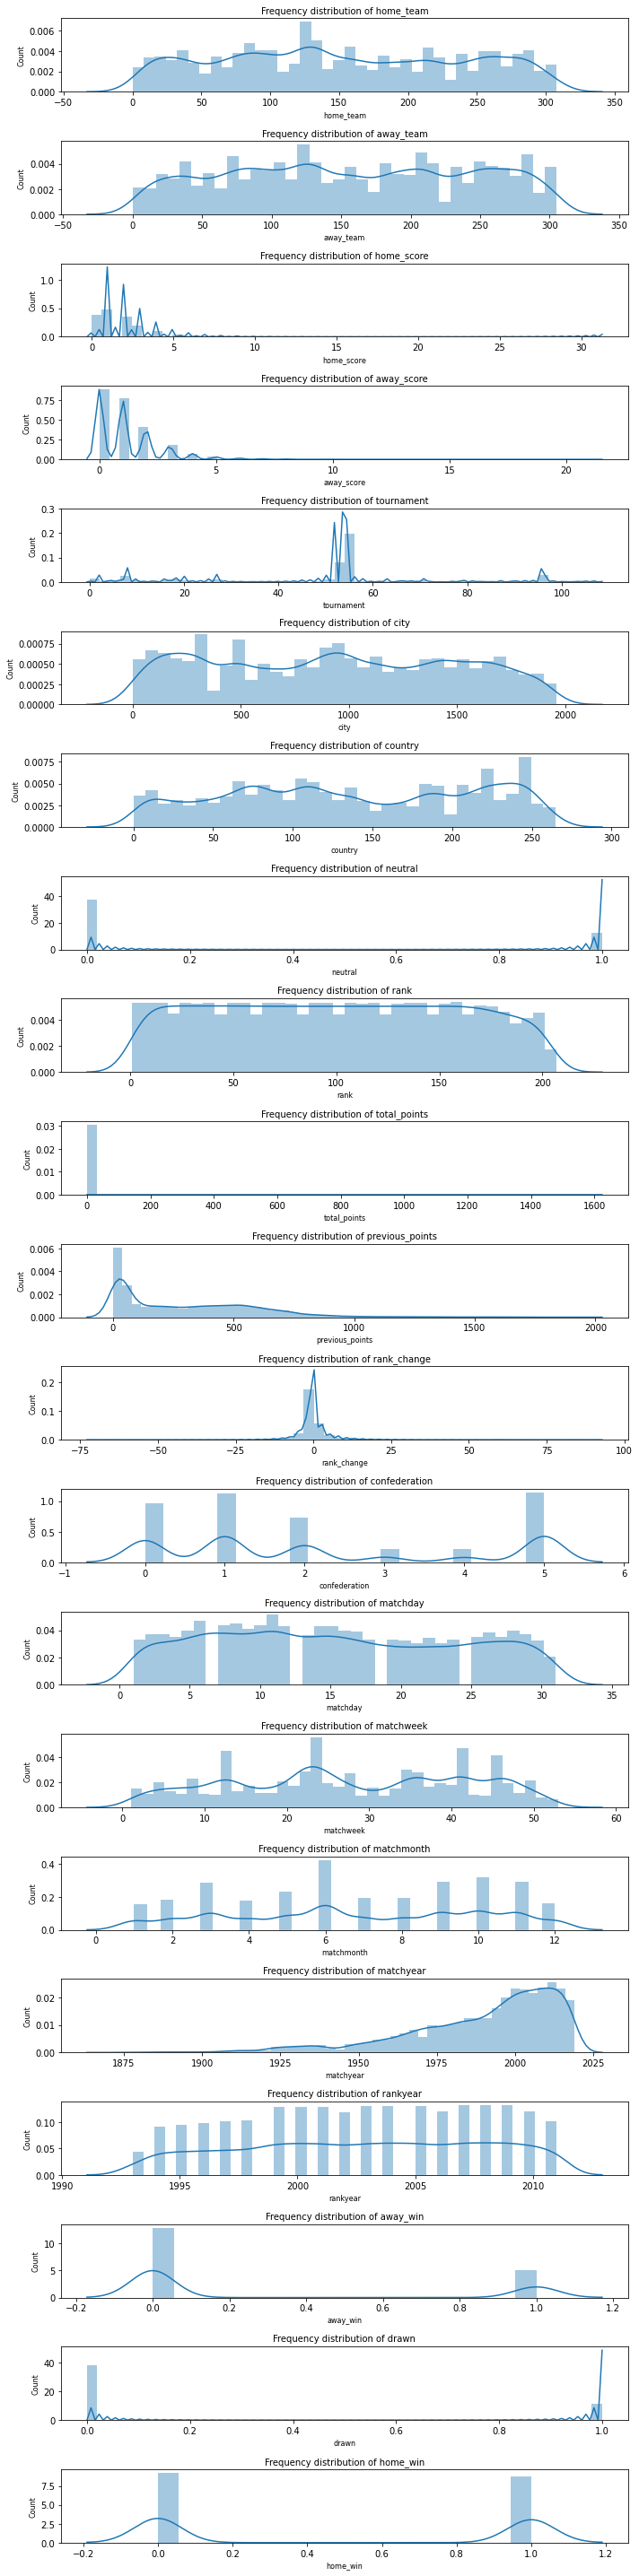

In [56]:
#importing the warnings library
import warnings
warnings.filterwarnings('ignore')
# Plotting distribution of numerical variables
col_names = ['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'rank', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'matchday', 'matchweek', 'matchmonth',
       'matchyear', 'rankyear', 'away_win', 'drawn', 'home_win']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(teams_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

# 2. Correlation matrix for the variables

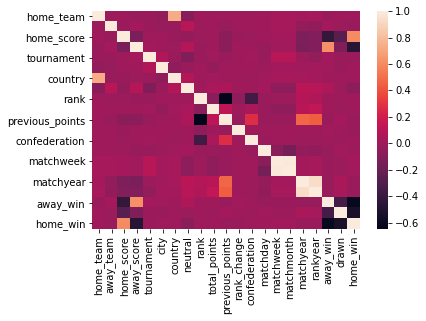

In [57]:
# Checking for independence between features¶
sns.heatmap(teams_data.corr())

<function matplotlib.pyplot.show>

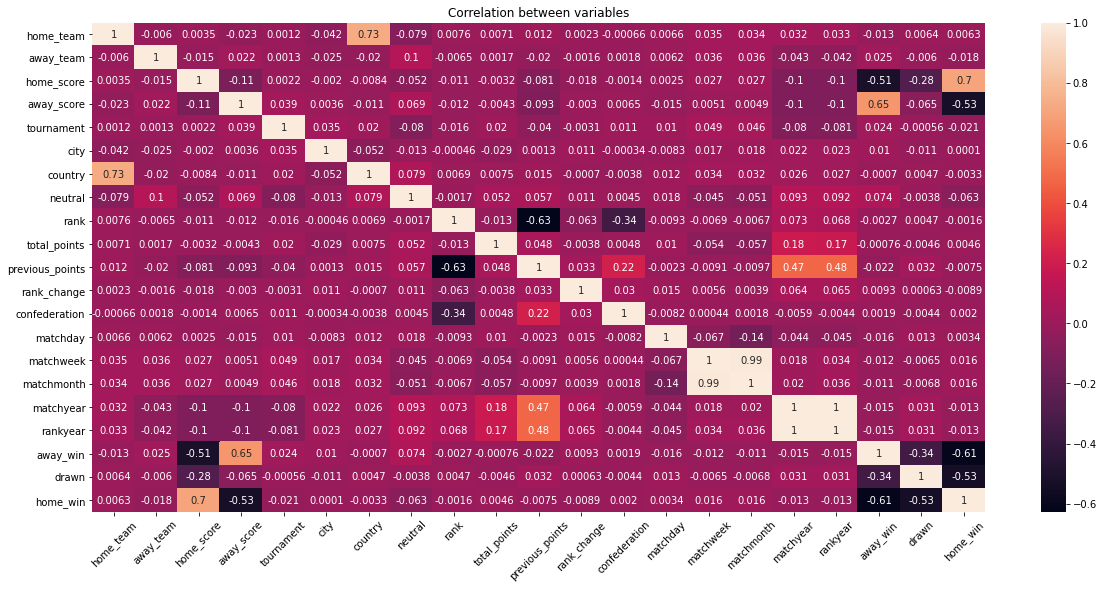

In [58]:
#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(20,9))
correlation_matrix=teams_data.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

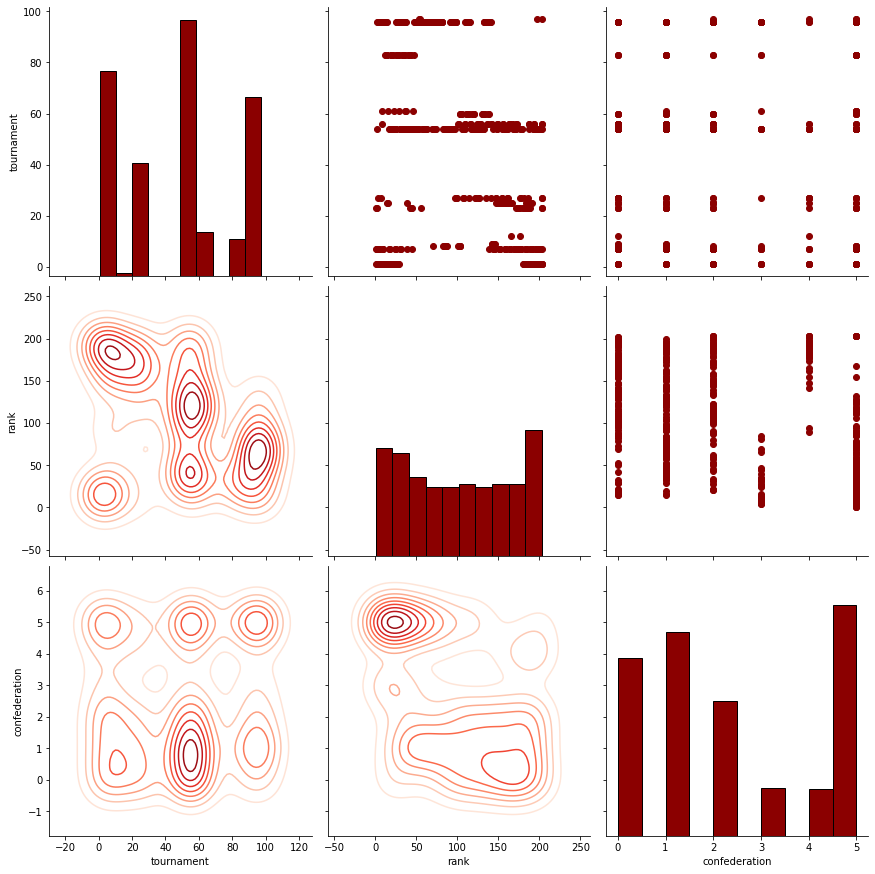

In [59]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= teams_data[teams_data['matchyear'] == 2019],vars = ['tournament','rank','confederation'], size = 4)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred',edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

# Observations from the univariate plots 

 ###  1.Distribution
* the attributes home_team,away_team,home_score,away_score,tournament,city,country,rank_change,confederation,matchday, matchweek,matchmonth.
* nomarl distribution-matchyear,rankyear,matchmonth,matchweek have an almost perfect nomarl distribution
* matchday,confederation,tournament,rankchange have multimodal distribution
* bimodal distribution- homewin,drawn, awaywin and neutral have bimodal distribution

###  2.Skewness 
* matchyear is left skewed while previous points,awayscore and homescore are right skewed

###  3.Correlation
From the heatmap there is moderate corerelation between:
* hometeam-country
* homescore-homewin.
* homescore-awaywin
* matchyear-previouspoints

proceeding  to build polynomial and logistic model to obtain the scores against against the given dataframe.

# 7. Implementing the Solution

# **Detecting multicollinearity**

In [60]:
# correlations between the variables
correlations = teams_data.corr()
correlations

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,away_win,drawn,home_win
home_team,1.000000,-0.008210,0.005179,-0.019501,-0.013873,-0.038902,0.733085,-0.079991,0.007198,0.004696,0.006653,0.000173,0.000045,0.007090,0.034430,0.033927,0.029204,0.030805,-0.013887,0.005625,0.007768
away_team,-0.008210,1.000000,-0.014927,0.024628,-0.011635,-0.023608,-0.021445,0.102481,-0.006500,0.009204,-0.019796,-0.000770,0.000887,0.006096,0.034954,0.034613,-0.035082,-0.042021,0.025613,-0.006028,-0.017993
home_score,0.005179,-0.014927,1.000000,-0.133412,0.003414,0.002042,-0.010174,-0.031660,-0.006569,0.002231,-0.069557,-0.011641,-0.006186,0.003238,0.025577,0.025382,-0.123567,-0.103941,-0.421703,-0.264146,0.602645
away_score,-0.019501,0.024628,-0.133412,1.000000,0.029274,0.005728,-0.006322,0.084335,-0.013709,0.004485,-0.071836,0.007927,0.005103,-0.017112,0.010436,0.011370,-0.133891,-0.105551,0.621396,-0.111361,-0.465938
tournament,-0.013873,-0.011635,0.003414,0.029274,1.000000,0.064036,-0.015143,-0.109582,-0.011434,0.011210,-0.012294,-0.001596,0.015370,-0.017930,0.099791,0.099694,-0.007229,-0.036647,0.026632,-0.009909,-0.015638
city,-0.038902,-0.023608,0.002042,0.005728,0.064036,1.000000,-0.049510,-0.012110,-0.000390,-0.028757,0.006060,0.003816,-0.000983,-0.007784,0.019347,0.020316,0.014900,0.021588,0.010190,-0.011204,0.000266
country,0.733085,-0.021445,-0.010174,-0.006322,-0.015143,-0.049510,1.000000,0.076458,0.006984,0.012717,0.009030,0.000183,-0.003027,0.013273,0.031448,0.029734,0.030677,0.027189,-0.001229,0.003770,-0.002071
neutral,-0.079991,0.102481,-0.031660,0.084335,-0.109582,-0.012110,0.076458,1.000000,-0.001556,0.038476,0.060493,0.008335,0.004107,0.018706,-0.054913,-0.056903,0.107900,0.095032,0.073757,-0.003767,-0.063273
rank,0.007198,-0.006500,-0.006569,-0.013709,-0.011434,-0.000390,0.006984,-0.001556,1.000000,-0.072534,-0.645624,-0.049728,-0.358539,-0.009967,-0.006406,-0.006098,0.090396,0.071956,-0.002663,0.004797,-0.001645
total_points,0.004696,0.009204,0.002231,0.004485,0.011210,-0.028757,0.012717,0.038476,-0.072534,1.000000,0.117906,0.007165,0.036477,-0.009392,-0.051291,-0.050759,0.100612,0.136305,0.000405,-0.008162,0.006518


# VIF score to detect multicollinearity for the dataset

In [61]:
#dataframe with the inverse of the correlations matrix for teams data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,away_win,drawn,home_win
home_team,2.260754,-0.052579,-0.040288,0.007695,0.039338,0.006587,-1.680844,0.323871,0.005473,0.006138,0.012028,-0.002158,-0.009100,-0.005596,0.043008,-0.050552,-0.003016,-0.062369,-6.041659e-03,-4.170663e-03,2.040976e-02
away_team,-0.052579,1.018965,0.017005,-0.002420,0.006001,0.022884,0.071180,-0.118771,0.015125,-0.016245,0.019275,0.003419,0.000694,-0.008826,-0.004444,-0.043206,-0.038501,0.084618,-1.621312e-02,-2.357291e-03,-9.309755e-03
home_score,-0.040288,0.017005,1.747786,-0.474435,-0.022451,-0.004026,0.040656,-0.028824,0.002201,-0.007027,0.013637,0.008526,0.012259,-0.004308,0.003553,-0.023701,0.267270,-0.127757,5.929450e-01,1.661724e-01,-8.224705e-01
away_score,0.007695,-0.002420,-0.474435,1.850147,-0.026866,0.000622,0.002511,-0.087449,0.022496,-0.018751,0.038321,0.001211,-0.010183,0.018843,-0.052389,0.021292,0.343959,-0.193803,-7.317042e-01,2.662379e-01,8.399746e-01
tournament,0.039338,0.006001,-0.022451,-0.026866,1.040112,-0.065239,-0.021614,0.119677,0.048603,-0.034919,0.058628,0.005858,-0.014570,0.009427,-0.075904,-0.023211,-0.325104,0.306254,-4.094702e-02,-1.552685e-02,-6.389918e-03
city,0.006587,0.022884,-0.004026,0.000622,-0.065239,1.009627,0.044963,-0.000090,0.001463,0.034346,-0.002381,-0.003964,0.002204,0.001123,0.016326,-0.029036,0.062943,-0.087654,-1.676764e-02,-6.298909e-04,-9.105302e-03
country,-1.680844,0.071180,0.040656,0.002511,-0.021614,0.044963,2.261423,-0.320293,-0.004366,-0.014947,-0.001292,0.002540,0.007989,-0.011650,-0.062086,0.026967,-0.032192,0.059915,1.031484e-02,6.960178e-03,-1.382319e-02
neutral,0.323871,-0.118771,-0.028824,-0.087449,0.119677,-0.000090,-0.320293,1.105302,0.014606,-0.026279,0.004923,-0.006792,-0.003260,-0.012825,-0.000626,0.054332,-0.223443,0.088599,-5.818857e-02,-3.330370e-02,-1.265166e-02
rank,0.005473,0.015125,0.002201,0.022496,0.048603,0.001463,-0.004366,0.014606,2.779573,0.037934,2.346954,0.191838,0.344016,0.028485,0.014339,0.063560,-1.645836,0.304010,2.630527e-03,3.633656e-03,2.531167e-02
total_points,0.006138,-0.016245,-0.007027,-0.018751,-0.034919,0.034346,-0.014947,-0.026279,0.037934,1.040235,-0.057048,-0.006779,-0.007791,0.010920,0.008903,0.054149,0.269464,-0.376591,1.632576e-03,-1.476144e-03,-1.665141e-02


####  rankyear,martchyear,matchmonth,matchweek,matchday have VIF greater than 5 ranging between 8-41

# **Residual plots and heteroskedasticity testing**

In [62]:
data=teams_data[['home_team','away_team','tournament','rank','matchyear','home_win','away_win','drawn','away_score','home_score']]
data.head(5)

,home_team,away_team,tournament,rank,matchyear,home_win,away_win,drawn,away_score,home_score
0,238,85,54,1,1872,0,0,1,0.0,0.0
1,85,233,54,2,1873,1,0,0,2.0,4.0
2,238,85,54,3,1874,1,0,0,1.0,2.0
3,85,233,54,4,1875,0,0,1,2.0,2.0
4,238,85,54,5,1876,1,0,0,0.0,3.0


# obtaining the residuals for the model 1 data using Linear regression

In [63]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(['home_score'],axis=1)
y = data['home_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.017235770935267236

means values between 0 and 1.(0-100%) model gives 0.017235(1.7%)


# Residual plot 1

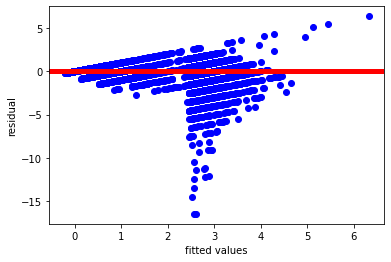

In [64]:
import matplotlib.pyplot as plt
plt.scatter(y_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

residual plots forms patterns around zero meaning there is a high correlation between variables

# **performing a heteroskedasticity test using bartlett's test.**

-Null Hypothsis:
**The variance is equal for all our datapoints**

-Alternative Hypothesis:
**The variance is different for at least one pair of datapoints.**

In [65]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!so the model is good,wau! Though i know there are patterns to the variance of the data')

5.660132003575336e-37
The variances are homogeneous!so the model is good,wau! Though i know there are patterns to the variance of the data


**Data_Model Testing with away_score**

In [66]:
# Selecting the modelling data
df_data=teams_data[['home_team','away_team','tournament','rank','matchyear','home_win','away_win','drawn','away_score','home_score']]
df_data.head(5)

,home_team,away_team,tournament,rank,matchyear,home_win,away_win,drawn,away_score,home_score
0,238,85,54,1,1872,0,0,1,0.0,0.0
1,85,233,54,2,1873,1,0,0,2.0,4.0
2,238,85,54,3,1874,1,0,0,1.0,2.0
3,85,233,54,4,1875,0,0,1,2.0,2.0
4,238,85,54,5,1876,1,0,0,0.0,3.0


# obtaining the residuals for the model 2 data using Linear regression 

In [67]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_data.drop(['away_score'],axis=1)
y = df_data['away_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# create the residual by substracting the test value from the predicted value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.02189520370534104

# **Residual plot 2**

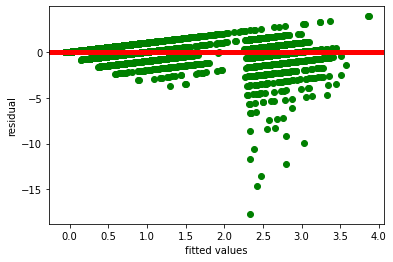

In [68]:
plt.scatter(y_predict, residuals, color='green')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

**This also has patterns arround zero**

In [69]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!it was just obvious like the previous one')

1.782597497745135e-08
The variances are homogeneous!it was just obvious like the previous one


In [0]:
# Implementing the Solution using the models

# **Polynomial Regression**

# **Model 1**

In [0]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [72]:
#loading data
#[['home_team','away_team','tournament','rank','matchyear','home_win','away_win','drawn','away_score','home_score']]
data=teams[['tournament','rank','home_score']]
data.head(5)

,tournament,rank,home_score
0,Friendly,1,0.0
1,Friendly,2,4.0
2,Friendly,3,2.0
3,Friendly,4,2.0
4,Friendly,5,3.0


In [73]:
#selecting dependent and independent data
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 ...
 [45]
 [46]
 [47]]
[0. 4. 2. ... 0. 0. 1.]


In [74]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
#Fitting the Polynomial regression to the dataset
#use PolynomialFeatures class of preprocessing library to add some extra features to the dataset
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 8)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

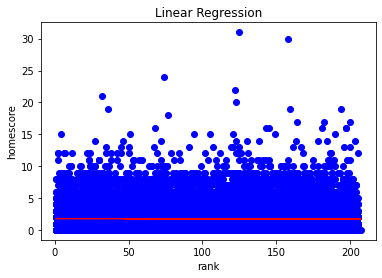

In [76]:
#Visulaizing the result for Linear Regression model  
plt.scatter(x,y,color="blue")  
plt.plot(x,lin_regs.predict(x), color="red")  
plt.title("Linear Regression")  
plt.xlabel("rank")  
plt.ylabel("homescore")  
plt.show()  

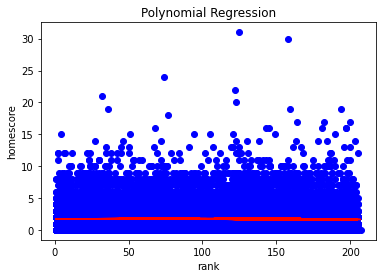

In [77]:
#Visulaizing the result for Polynomial Regression  
plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
plt.title("Polynomial Regression")  
plt.xlabel("rank")  
plt.ylabel("homescore")  
plt.show()  

In [78]:
# Obtain coefficients
lin_reg_2.coef_

array([ 0.00000000e+00,  2.00589968e-10,  9.84744778e-08,  1.88153536e-06,
       -6.53551400e-08,  8.65079534e-10, -5.39201535e-12,  1.57610181e-14,
       -1.72163995e-17])

In [79]:
#Prediction of the number of goals scored by the home team using linear regression
lin_pred = lin_regs.predict([[5]])  
print(int(lin_pred))  

1


In [80]:
#Prediction of the number of goals scored by the home team using polynomial regression
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[5]]))  
print(int(poly_pred)) 

1


# **Model 2**

In [81]:
#data for model 2
data2=teams[['tournament','rank','away_score']]
data2.head(5)

,tournament,rank,away_score
0,Friendly,1,0.0
1,Friendly,2,2.0
2,Friendly,3,1.0
3,Friendly,4,2.0
4,Friendly,5,0.0


In [82]:
#selecting dependent and independent data
x = data2.iloc[:, 1:2].values
y = data2.iloc[:, 2].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 ...
 [45]
 [46]
 [47]]
[0. 2. 1. ... 1. 1. 1.]


In [83]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 8)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

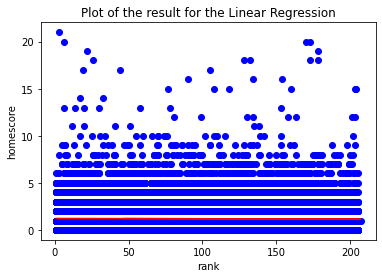

In [85]:
#Visulaizing the result for Linear Regression model  
plt.scatter(x,y,color="blue")  
plt.plot(x,lin_regs.predict(x), color="red")  
plt.title("Plot of the result for the Linear Regression")  
plt.xlabel("rank")  
plt.ylabel("homescore")  
plt.show()  

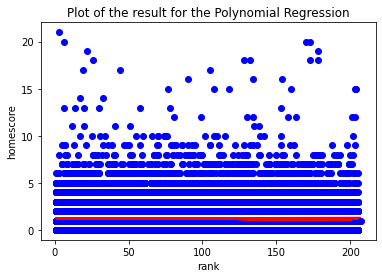

In [86]:
#Visulaizing the result for Polynomial Regression  
plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
plt.title("Plot of the result for the Polynomial Regression")  
plt.xlabel("rank")  
plt.ylabel("homescore")  
plt.show() 

In [87]:
# Obtain coefficients
lin_reg_2.coef_

array([ 0.00000000e+00, -4.31750002e-10, -2.12054850e-07, -4.05121086e-06,
        1.63462220e-07, -2.62917989e-09,  2.06335743e-11, -7.85228376e-14,
        1.15874528e-16])

In [88]:
#Prediction of the number of goals scored by the away team using linear regression
lin_pred = lin_regs.predict([[5]])  
print(int(poly_pred)) 

1


In [89]:
#Prediction of the number of goals scored by the away team using polynomial regression
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[5]]))  
print(int(poly_pred))

1


**LOGISTIC REGRESSION**

In [90]:
#loadding the data
teams_data

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,confederation,matchday,matchweek,matchmonth,matchyear,rankyear,result,away_win,drawn,home_win
0,238,85,0.0,0.0,54,625,204,0,1,0.00,57,0,5,30,48,11,1872,1993,drawn,0,1,0
1,85,233,4.0,2.0,54,977,69,0,2,0.00,57,0,5,8,10,3,1873,1993,home_win,0,0,1
2,238,85,2.0,1.0,54,625,204,0,3,0.00,50,9,5,7,10,3,1874,1993,home_win,0,0,1
3,85,233,2.0,2.0,54,977,69,0,4,0.00,55,0,5,6,9,3,1875,1993,drawn,0,1,0
4,238,85,3.0,0.0,54,625,204,0,5,0.00,51,5,3,4,9,3,1876,1993,home_win,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,5,262,8.0,1.0,83,87,201,1,42,625.73,576,8,0,18,29,7,2019,2011,home_win,0,0,1
40835,94,243,4.0,4.0,83,87,201,1,44,624.77,613,-1,1,18,29,7,2019,2011,drawn,0,1,0
40836,239,4,0.0,1.0,7,314,67,1,45,618.79,374,45,5,19,29,7,2019,2011,away_win,1,0,0
40837,268,189,0.0,1.0,61,27,105,1,46,607.91,610,-2,5,19,29,7,2019,2011,away_win,1,0,0


In [91]:
#selecting the data for the model
#[['home_team','away_team','tournament','rank','matchyear','home_win','away_win','drawn','away_score','home_score']]
data=teams_data[['result','home_team','away_team','tournament','rank','matchyear','home_win','away_win','drawn','away_score','home_score']]
data

,result,home_team,away_team,tournament,rank,matchyear,home_win,away_win,drawn,away_score,home_score
0,drawn,238,85,54,1,1872,0,0,1,0.0,0.0
1,home_win,85,233,54,2,1873,1,0,0,2.0,4.0
2,home_win,238,85,54,3,1874,1,0,0,1.0,2.0
3,drawn,85,233,54,4,1875,0,0,1,2.0,2.0
4,home_win,238,85,54,5,1876,1,0,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
40834,home_win,5,262,83,42,2019,1,0,0,1.0,8.0
40835,drawn,94,243,83,44,2019,0,0,1,4.0,4.0
40836,away_win,239,4,7,45,2019,0,1,0,1.0,0.0
40837,away_win,268,189,61,46,2019,0,1,0,1.0,0.0


In [92]:
# Splitting our dataset
X = data.drop(["home_win","result"],axis=1)
y = data["home_win"]
print(X.shape,y.shape)

(40839, 9) (40839,)


In [0]:
#splitting the data
#import the library for splitting
from sklearn.model_selection import train_test_split
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [94]:
# Fitting our model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using the  model to make a prediction
y_pred = model.predict(X_test)

In [96]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[6259,    0],
       [   0, 5993]])

**from the results in the confusion matrix  TP 6259 and TN 5993 are the number of correct predictions.
FP 0 and FN 0 are the number of incorrect predictions.**

# Best parameters used in the model

**Random search**

In [0]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [0]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [0]:
# Training and Cross Validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [100]:
# Printing the accuracies returned for five folds 
print(all_accuracies.mean())

1.0


In [0]:
# Hyperparameters with Random Search
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [0]:
# Step 2: Instantiating RandomizedSearchCV object 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [103]:
# Calling the fit method
random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [104]:
#Checking the parameters that return the highest accuracy
best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 3}


In [105]:
#accuracy
best_result = random_sr.best_score_
print(best_result)

1.0


**Grid Search**

In [0]:
# Hyperparameters Grid Search
# create a dictionary of all the parameters and their corresponding set of values to test for best performance. 
#grid_param dictionary with three parameters n_estimators, criterion, and bootstrap. 

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [0]:
# Instantiating GridSearchCV object
# The param_grid parameter takes the parameter dictionary 
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [108]:
# Calling the fit method
# after the GridSearchCV class is initialized,the fit method of the class and pass it the training and test set
gd_sr.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [109]:
# Checking the parameters that return the highest accuracy
# print the sr.best_params_ attribute of the GridSearchCV object
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [110]:
# Finding the obtained accuracy using the best parameters. 
best_result = gd_sr.best_score_
print(best_result)

1.0


Logistic Model

In [0]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split
#To calculate accuracy measures and confusion matrix
from sklearn import metrics

In [0]:
#Split Data Into Training & Test Data

In [113]:
#select all rows and first 3 columns which are the 
#independent attributes
X = data2.iloc[:, 1:2].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 ...
 [45]
 [46]
 [47]]


In [114]:
#select all rows and the 3rd column which is the target column 
#classification "1", "0" for diabetes(Dependent variable)
Y = data2.iloc[:, 2].values
print(Y)

[0. 2. 1. ... 1. 1. 1.]


In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code

In [0]:
#Splitting Data into train-test where 70% will be used for training 
#and rest 30% for Testing our model built on test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [0]:
 #build the model

In [0]:
# Use method LogisticRegression() imported from sklearn
model = LogisticRegression()

In [119]:
#So here we get our optimal surface which will be our model 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Assessment

In [121]:
#Let's pass X-Train data to our model and see how it predicts to
# label all the independent training data as shown below:
y_predict = model.predict(X_test)
print("Predicted values", y_predict)

Predicted values [0. 0. 0. ... 0. 0. 0.]


In [122]:
#coefficient can be calculated as shown below making use of 
#model.coef_ method
column_label = list(X_train) # To label all the coefficient
model_Coeff = pd.DataFrame(model.coef_, columns = column_label)
model_Coeff['intercept'] = model.intercept_
print("Coefficient Values  Are: ", model_Coeff)

Streaming output truncated to the last 5000 lines.
          63          
         172          
          29          
          86          
          87          
         197          
         177          
         174          
         179          
          71          
          12          
          65          
         102          
          64          
          74          
         160          
         113          
          49          
          74          
          95          
          78          
         134          
          46          
         119          
         129          
         167          
         121          
         185          
         171          
         154          
          63          
         131          
          88          
          53          
          72          
          87          
         171          
         194          
          79          
           4          
         135          
      

In [123]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print("Model Score comes out to be:",accuracy_score(y_test, y_pred), "which in terms of percentage is", accuracy_score(y_test, y_pred)*100,". It is not up to the mark.")

0.3483512895853738
Model Score comes out to be: 0.3483512895853738 which in terms of percentage is 34.83512895853738 . It is not up to the mark.


### Other Measures for the  Model Performance Using Confusion Metrics:

Accuracy: 50.551%
F1 Score:  0.3357729527527039
Precision Score:  0.25275465230166505
Recall Score:  0.5


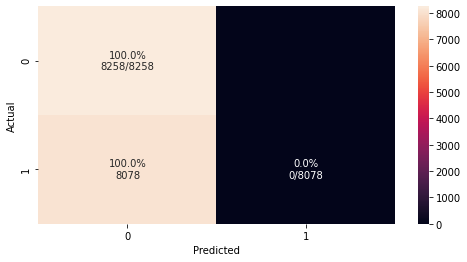

In [124]:
from sklearn import model_selection
test_size = 0.40
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,5)):   
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,4))

# ROC Curve

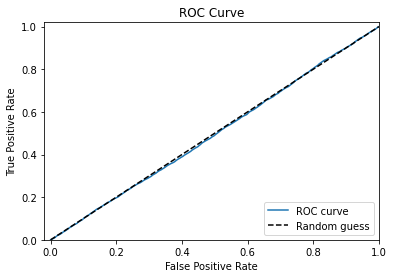

In [125]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = lr_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# precision-recall curve and f1

Logistic: f1=0.000 auc=0.494


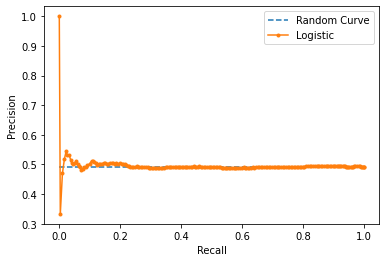

In [126]:
# precision-recall curve and f1
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
logistic_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
logistic_probs = logistic_probs[:, 1]
# predict class values
y_pred = model.predict(X_test)
logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_probs)
logistic_f1, logistic_auc = f1_score(y_test, y_pred), auc(logistic_recall, logistic_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (logistic_f1, logistic_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Curve')
pyplot.plot(logistic_recall, logistic_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#Running the example first prints the F1, area under curve (AUC) for the logistic regression model.


## 8. Challenging the solution

In [0]:
# Reviewing the Solution 

In [0]:
#best parameters
#gridsearch={'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
#Randomsearch={'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 5}

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2)

In [0]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [0]:
# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#clf = RandomForestClassifier(n_estimators=100,max_depth=3,max_features=None,min_samples_leaf=5,random_state=0,bootstrap=False,min_samples_split = 5)
clf = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_leaf=3,min_samples_split=5, max_features=0.8 ,n_jobs=1)

In [133]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# Use predict_proba to predict probability of the class
y_pred = clf.predict(X_test)

In [176]:
RMSE = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)
print('Root Mean square error :',RMSE)
baseline = 0.50551
result = model.score(X_test, y_test)
diff =(result*100.0-(baseline)*100.0)
print("Accuracy: %.3f%%" % (result*100.0))
print("Accuracy improved by: %.3f%%" % (diff))

Root Mean square error : 0.501
Accuracy: 51.112%
Accuracy improved by: 0.561%


In [140]:
#installing the package for the library for plotting ROC
!pip install plot-metric


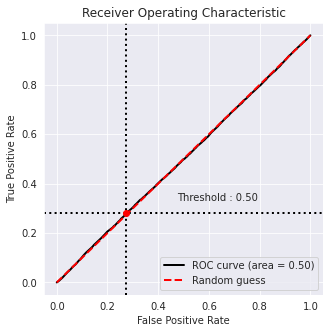

In [141]:
#importing the library for plotting ROC
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### After tuning parameters the model improved by  0.561%

# 9. Follow up questions

### a). Did we have the right data?

No.The data was not linked with a unique id in the two tables hence cleaning caused some changes which have had effect to the models performance

### b). Do we need other data to answer our question?

Yes

### c). Did we have the right question?

Yes